In [5]:
#Private cell

fpath = r'../Outputs/Katrina/All_Model_Results_We do not insure for.csv'

In [6]:
#LOCAL RUN#
import pandas as pd 
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
from scipy.spatial.distance import cosine
from tqdm import tqdm
import os


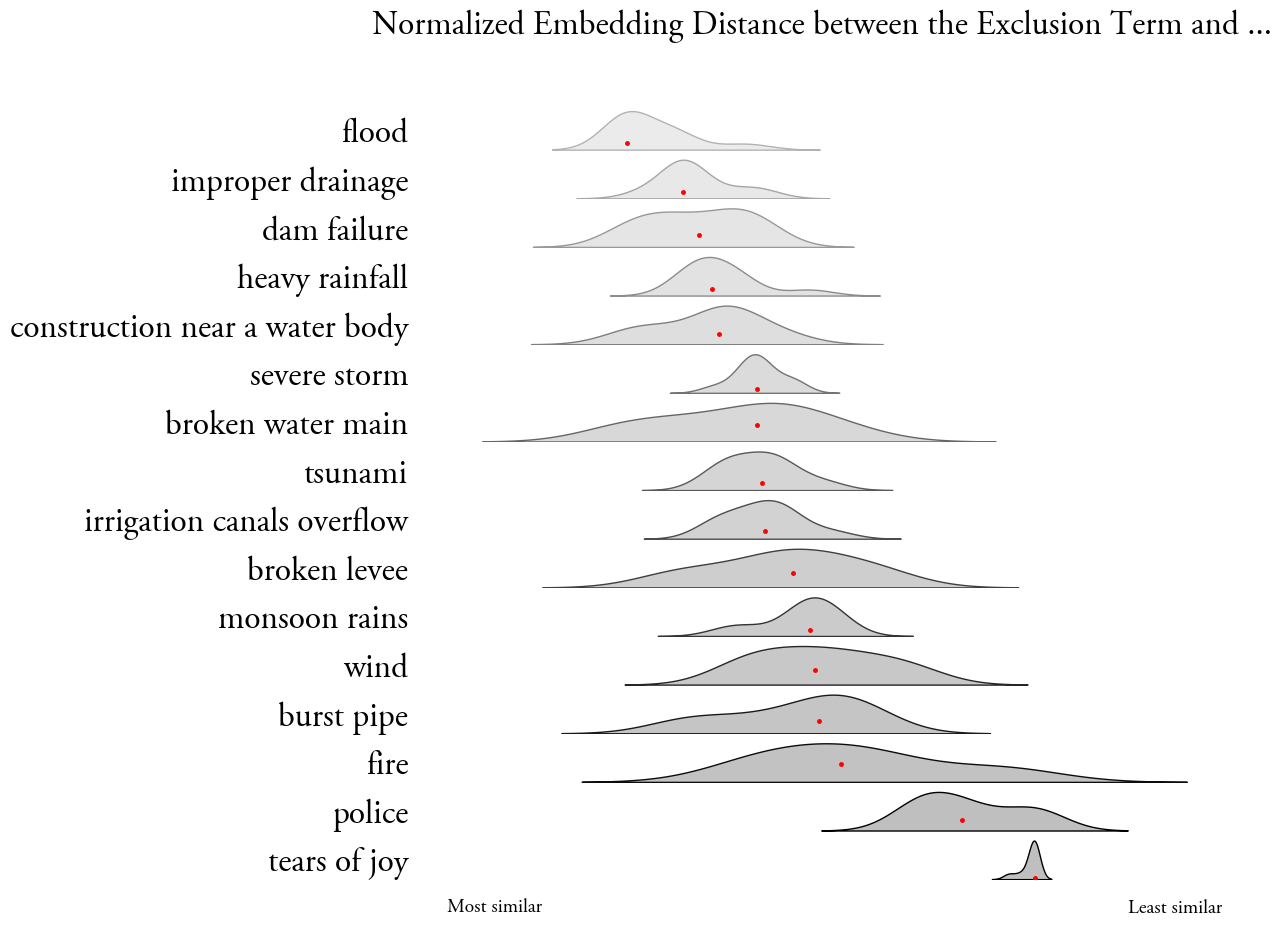

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize the distances by model to show degree of dissimilarity.
def normalize_dissimilarity_by_model(df, column_name):
    df['Normalized Dissimilarity'] = df.groupby('Model')[column_name].transform(
        lambda x: 1 - ((x - x.min()) / (x.max() - x.min())))
    return df

# Generate the plot showing degree of dissimilarity and add a horizontal line along with the "fake" x-axis label.
def generate_dissimilarity_plot_with_fake_axis_and_line(df, title, cmap):
    df = normalize_dissimilarity_by_model(df, 'Raw Similarity')
    median_dissimilarities = df.groupby('Term')['Normalized Dissimilarity'].median().sort_values(ascending=True)
    
    try:
        plt.rc('font', family='Adobe Garamond Pro')
    except:
        print(f"Font 'Adobe Garamond Pro' not found. Using default.")
    
    terms = median_dissimilarities.index.tolist()
    fig, axs = plt.subplots(len(terms), 1, sharex=True, figsize=(10, 10))
    colormap = plt.get_cmap(cmap)
    
    lower_bound = 0.3
    upper_bound = 0.7
    step_size = (upper_bound - lower_bound) / len(terms)
    
    for i, (ax, term) in enumerate(zip(axs, terms)):
        dissimilarities = df[df['Term'] == term]['Normalized Dissimilarity'].tolist()
        color_shade = colormap(lower_bound + (i * 2 * step_size))
        sns.kdeplot(x=dissimilarities, ax=ax, fill=True, color=color_shade, lw=1)
        ax.text(-0.05, 0.4, term, va='center', ha='right', rotation=0, transform=ax.transAxes, fontsize=24)
        ax.plot(median_dissimilarities[term], 0.75, color='red', marker='o', markersize=2.5)
        ax.set_ylabel('')
        ax.label_outer()
        ax.set_yticks([])
        ax.set_xticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)

    # Add fake x-axis label and line at the bottom
    axs[-1].text(0, -0.7, 'Most similar', va='center', ha='left', fontsize=14, transform=axs[-1].transAxes)
    axs[-1].text(1, -0.7, 'Least similar', va='center', ha='right', fontsize=14, transform=axs[-1].transAxes)
    axs[-1].plot([0, 1], [-0.6, -0.6], color='black', lw=1, transform=axs[-1].transAxes)

    plt.suptitle("Normalized " + title, fontsize=24)
    plt.show()
    plt.close()


df = pd.read_csv(fpath)

# Define variables
title = "Embedding Distance between the Exclusion Term and ..."
cmap = 'binary'

# Generate the dissimilarity plot with fake x-axis and line
generate_dissimilarity_plot_with_fake_axis_and_line(df, title, cmap)
